In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
#List of variables that have string values
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Function (Yes = 1, No = 0)
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

#Applying function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

#Checking housing dataframe
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

#Specify this so the training and testing data sets have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape, df_test.shape

((436, 13), (109, 13))

In [7]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000


In [8]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()

df_Newtrain[num_vars] = m_scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = m_scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(10), df_Newtest.head(10)

(         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
 542  0.124199       0.2        0.0  0.000000       1.0        0.0       0.0   
 496  0.150654       0.2        0.0  0.000000       1.0        0.0       0.0   
 484  0.083821       0.2        0.0  0.000000       0.0        0.0       0.0   
 507  0.122807       0.2        0.0  0.000000       1.0        0.0       0.0   
 252  0.558619       0.4        0.0  0.000000       1.0        0.0       0.0   
 263  0.148427       0.4        0.0  0.333333       0.0        0.0       0.0   
 240  0.139515       0.4        0.0  0.333333       1.0        0.0       0.0   
 175  0.554442       0.6        0.5  0.333333       1.0        1.0       0.0   
 385  0.125592       0.2        0.0  0.000000       1.0        0.0       0.0   
 374  0.117238       0.2        0.5  0.000000       1.0        0.0       1.0   
 
      hotwaterheating  airconditioning   parking  prefarea     price  
 542              0.0              0.0  0.00000

In [9]:
Y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
Y_Normtest = df_Newtest.pop('price')
X_Normtest = df_Newtest.copy()

In [10]:
df_Newtrain.shape

(436, 11)

In [26]:
X1 = X_Normtrain.values[:, 0] #Area values
X2 = X_Normtrain.values[:, 1] #Bedroom values
X3 = X_Normtrain.values[:, 2] #Bathroom values
X4 = X_Normtrain.values[:, 3] #Stories values
X5 = X_Normtrain.values[:, 4] #Mainroad values
X6 = X_Normtrain.values[:, 5] #Guestroom values
X7 = X_Normtrain.values[:, 6] #Basement values
X8 = X_Normtrain.values[:, 7] #Hotwaterheating values
X9 = X_Normtrain.values[:, 8] #AC values
X10 = X_Normtrain.values[:, 9] #Parking values
X11 = X_Normtrain.values[:, 10] #Prefarea values

X1_test = X_Normtest.values[:, 0] #Area values
X2_test = X_Normtest.values[:, 1] #Bedroom values
X3_test = X_Normtest.values[:, 2] #Bathroom values
X4_test = X_Normtest.values[:, 3] #Stories values
X5_test = X_Normtest.values[:, 4] #Mainroad values
X6_test = X_Normtest.values[:, 5] #Guestroom values
X7_test = X_Normtest.values[:, 6] #Basement values
X8_test = X_Normtest.values[:, 7] #Hotwaterheating values
X9_test = X_Normtest.values[:, 8] #AC values
X10_test = X_Normtest.values[:, 9] #Parking values
X11_test = X_Normtest.values[:, 10] #Prefarea values


X1[:5]

array([0.12419939, 0.15065441, 0.08382066, 0.12280702, 0.55861877])

In [12]:
#Y = Y_Normtrain.values #Pricing values
#Y_test = Y_Normtest.values #Pricing values

Y = df_train['price']
Y_test = df_test['price']
Y

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [13]:
m_train = len(Y_Normtrain)
m_test = len(Y_Normtest)
m_train, m_test

(436, 109)

In [14]:
X_0 = np.ones((m_train, 1))
X_0_test = np.ones((m_test, 1))

In [15]:
#Reshape function used to convert X from 1D to 2D array of m x 1
X_1 = X1.reshape(m_train, 1)
X_2 = X2.reshape(m_train, 1)
X_3 = X3.reshape(m_train, 1)
X_4 = X4.reshape(m_train, 1)
X_5 = X5.reshape(m_train, 1)
X_6 = X6.reshape(m_train, 1)
X_7 = X7.reshape(m_train, 1)
X_8 = X8.reshape(m_train, 1)
X_9 = X9.reshape(m_train, 1)
X_10 = X10.reshape(m_train, 1)
X_11 = X11.reshape(m_train, 1)

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

In [16]:
#hstack() function from numpy to have X_0 to X_11 in one final Matrix
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))

In [17]:
theta = np.zeros(12)
theta

lambda_val = 20

In [18]:
def compute_cost(X, Y, theta, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    pen_parameter = np.square(theta)
    penalty = Lambda * np.sum(pen_parameter)
    J = 1 / (2 *m) * (np.sum(sqrErrors) + penalty)
    
    return J

In [19]:
cost = compute_cost(X, Y, theta, lambda_val)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 10587991986906.973


In [20]:
def gradient_descent(X, Y, theta, alpha, iterations, Lambda):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        pen_parameter = np.square(errors)
        penalty = np.multiply((Lambda/m), theta)
        sum_delta = (alpha / m) * (X.transpose().dot(errors) + penalty) 
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta, Lambda)
        
    return theta, cost_history

In [21]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [22]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations, lambda_val)
theta_test, cost_history_test = gradient_descent(X_test, Y_test, theta, alpha, iterations, lambda_val)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final value of theta_test =', theta_test)
print('cost_history_test =', cost_history_test)

Final value of theta = [1759877.76943097 1108860.11158334 1031033.24636703 1335344.822361
 1155063.09637451  991156.84451268  510053.91835948  373255.00381997
  544881.15113297 1061902.68790533  933494.73014087  820168.05887718]
cost_history = [1.01942533e+13 9.81646181e+12 9.45397376e+12 ... 7.88151801e+11
 7.88146946e+11 7.88142132e+11]
Final value of theta_test = [1736611.99818411 1252319.32937926 1032223.14790143 1481733.33598792
 1242962.91416219  902151.26340881  307938.85974743  319909.00756437
  502816.54120723 1055938.94864623 1098349.24036173  579614.4839671 ]
cost_history_test = [3.46256003e+11 3.46203102e+11 3.46150541e+11 ... 3.40934810e+11
 3.40939661e+11 3.40944515e+11]


Text(0.5, 1.0, 'Convergence of gradient descent')

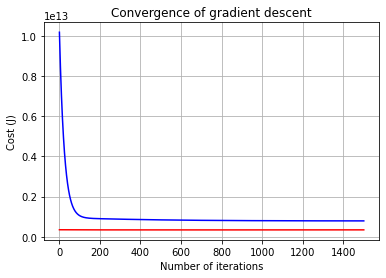

In [23]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.plot(range(1, iterations + 1), cost_history_test, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')